# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [2]:
Alert_data = pd.read_excel('alerts_created.xlsx')
Alert_data.head()

,id,user_id,type,market,currency,data,is_active,is_deleted,max_notifications,notifications,...,updated_at,deleted_at,last_checked,last_sent,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,3,1343,price_point,POLONIEX,XRP_USD,"{\comparison\"":\""sell_price\""","\""value\"":\""0.32\""","\""operator\"":\"">=\""}""",1,0,...,NaN,2017-01-17 07:45:21,2019-07-12 22:29:03,NaN,NaT,NaT,NaT,NaN,NaN,NaN
1,5,1344,price_point,BITTREX,BTC_TRIG,"{\comparison\"":\""buy_price\""","\""value\"":\"".0000071\""","\""operator\"":\"">=\""}""",0,0,...,NaN,2017-01-17 08:45:31,2017-01-17 08:46:26,NaN,NaT,NaT,NaT,NaN,NaN,NaN
2,6,1345,regular_update,BITSTAMP,BTC_EUR,"{\comparison\"":\""buy_price\""","\""value\"":\""1day\""}""",0,0,NaN,...,2017-01-17 08:50:15,2017-03-31 23:00:19,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
3,7,1348,price_point,BITSTAMP,BTC_EUR,"{\comparison\"":\""buy_price\""","\""value\"":\""600\""","\""operator\"":\""<=\""}""",0,1,...,NaN,2017-01-17 12:11:20,2019-01-06 03:06:52,2018-04-29 08:40:49,NaT,NaT,NaT,NaN,NaN,NaN
4,8,1348,price_point,BITSTAMP,BTC_USD,"{\comparison\"":\""buy_price\""","\""value\"":\""650\""","\""operator\"":\""<=\""}""",0,1,...,NaN,2017-01-17 12:11:43,2018-04-29 08:40:45,2018-04-29 08:40:45,NaT,NaT,NaT,NaN,NaN,NaN


In [3]:
Alert_data['data'] = Alert_data['data'].astype(str) + Alert_data['is_active'].astype(str) + Alert_data['is_deleted'].astype(str)
Alert_data.head()

,id,user_id,type,market,currency,data,is_active,is_deleted,max_notifications,notifications,...,updated_at,deleted_at,last_checked,last_sent,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,3,1343,price_point,POLONIEX,XRP_USD,"{\comparison\"":\""sell_price\""\""value\"":\""0.32\...","\""value\"":\""0.32\""","\""operator\"":\"">=\""}""",1,0,...,NaN,2017-01-17 07:45:21,2019-07-12 22:29:03,NaN,NaT,NaT,NaT,NaN,NaN,NaN
1,5,1344,price_point,BITTREX,BTC_TRIG,"{\comparison\"":\""buy_price\""\""value\"":\"".00000...","\""value\"":\"".0000071\""","\""operator\"":\"">=\""}""",0,0,...,NaN,2017-01-17 08:45:31,2017-01-17 08:46:26,NaN,NaT,NaT,NaT,NaN,NaN,NaN
2,6,1345,regular_update,BITSTAMP,BTC_EUR,"{\comparison\"":\""buy_price\""\""value\"":\""1day\""}""0","\""value\"":\""1day\""}""",0,0,NaN,...,2017-01-17 08:50:15,2017-03-31 23:00:19,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
3,7,1348,price_point,BITSTAMP,BTC_EUR,"{\comparison\"":\""buy_price\""\""value\"":\""600\""\...","\""value\"":\""600\""","\""operator\"":\""<=\""}""",0,1,...,NaN,2017-01-17 12:11:20,2019-01-06 03:06:52,2018-04-29 08:40:49,NaT,NaT,NaT,NaN,NaN,NaN
4,8,1348,price_point,BITSTAMP,BTC_USD,"{\comparison\"":\""buy_price\""\""value\"":\""650\""\...","\""value\"":\""650\""","\""operator\"":\""<=\""}""",0,1,...,NaN,2017-01-17 12:11:43,2018-04-29 08:40:45,2018-04-29 08:40:45,NaT,NaT,NaT,NaN,NaN,NaN


In [4]:
Alert_data = Alert_data.drop('is_active', axis = 1)
Alert_data = Alert_data.drop('is_deleted', axis = 1)

In [5]:
Alert_data.columns = ['id', 'user_id', 'type', 'market', 'currency', 'data', 'is_active',
       'is_deleted', 'max_notifications', 'notifications', 'snooze',
       'custom_message', 'created_at', 'updated_at', 'deleted_at',
       'last_checked', 'last_sent', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20']

In [6]:
Alert_data = Alert_data.drop(Alert_data.columns[[11, 17, 18, 19, 20]], axis = 1)

# Subsetting Over Price Point

In [7]:
Alert_price_point = Alert_data[Alert_data['type'] == 'price_point']
Alert_price_point = Alert_price_point.reset_index()

In [8]:
Alert_price_point = Alert_price_point.drop('index', axis = 1)

# Splitting 'Data' Column

In [9]:
import json
# val = Alert_price_point.iloc[0]["data"]
# print(val)
def convert_str_to_proper_dict(val):
  val = r'"' + val
  val = val[:3] + '"' + val[3:]
  val = val.replace(r'\"\"', r'\",\"')
  val = val.replace('null', 'null,')
  val = "".join(val.split())
  return json.loads(json.loads(val))

In [10]:
q = list(Alert_price_point["data"])
for idx, val in enumerate(q):
  try:
    convert_str_to_proper_dict(val)
  except:
    print(f"idx is {idx}")
    break

In [11]:
print(q[23811].strip())
convert_str_to_proper_dict(q[23811])

{\comparison\":\"buy_price\"\"value\":\"	0.0009\"\"operator\":\">=\"}"


{'comparison': 'buy_price', 'value': '0.0009', 'operator': '>='}

In [12]:
Alert_price_point["data"] = Alert_price_point["data"].apply(convert_str_to_proper_dict)

In [13]:
json_df = pd.json_normalize(Alert_price_point["data"])
# json_df

# Merging the splitted column back to the original data

In [14]:
JSON_price_point_df = pd.concat([Alert_price_point, json_df], axis = 1)
JSON_price_point_df.head()

,id,user_id,type,market,currency,data,is_active,is_deleted,max_notifications,notifications,snooze,created_at,updated_at,deleted_at,last_checked,last_sent,comparison,value,operator
0,3,1343,price_point,POLONIEX,XRP_USD,"{'comparison': 'sell_price', 'value': '0.32', ...",1,0,6,4,5min,2017-01-17 07:45:21,2019-07-12 22:29:03,NaN,NaT,NaT,sell_price,0.32,>=
1,5,1344,price_point,BITTREX,BTC_TRIG,"{'comparison': 'buy_price', 'value': '.0000071...",0,0,1,0,5min,2017-01-17 08:45:31,2017-01-17 08:46:26,NaN,NaT,NaT,buy_price,.0000071,>=
2,7,1348,price_point,BITSTAMP,BTC_EUR,"{'comparison': 'buy_price', 'value': '600', 'o...",0,1,1,2,5min,2017-01-17 12:11:20,2019-01-06 03:06:52,2018-04-29 08:40:49,NaT,NaT,buy_price,600,<=
3,8,1348,price_point,BITSTAMP,BTC_USD,"{'comparison': 'buy_price', 'value': '650', 'o...",0,1,1,2,5min,2017-01-17 12:11:43,2018-04-29 08:40:45,2018-04-29 08:40:45,NaT,NaT,buy_price,650,<=
4,9,1348,price_point,KRAKEN,LTC_EUR,"{'comparison': 'buy_price', 'value': '2.5', 'o...",0,1,1,0,5min,2017-01-17 12:13:31,2018-04-29 08:40:40,2018-04-29 08:40:40,NaT,NaT,buy_price,2.5,<=


In [15]:
JSON_price_point_df['created_at'] = pd.to_datetime(JSON_price_point_df['created_at'])

In [16]:
JSON_price_point_df.shape

(80512, 19)

# Checking for null values

In [17]:
JSON_price_point_df.isnull().sum().sum()

212670

# Dropping irrelevant columns

In [18]:
JSON_price_point_df = JSON_price_point_df.drop(JSON_price_point_df.columns[[12, 13, 14, 15]], axis = 1)
JSON_price_point_df = JSON_price_point_df.drop(JSON_price_point_df.columns[[5]], axis = 1)
JSON_price_point_df.head()

,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,comparison,value,operator
0,3,1343,price_point,POLONIEX,XRP_USD,1,0,6,4,5min,2017-01-17 07:45:21,sell_price,0.32,>=
1,5,1344,price_point,BITTREX,BTC_TRIG,0,0,1,0,5min,2017-01-17 08:45:31,buy_price,.0000071,>=
2,7,1348,price_point,BITSTAMP,BTC_EUR,0,1,1,2,5min,2017-01-17 12:11:20,buy_price,600,<=
3,8,1348,price_point,BITSTAMP,BTC_USD,0,1,1,2,5min,2017-01-17 12:11:43,buy_price,650,<=
4,9,1348,price_point,KRAKEN,LTC_EUR,0,1,1,0,5min,2017-01-17 12:13:31,buy_price,2.5,<=


In [19]:
JSON_price_point_df.isnull().sum()

id                     0
user_id                0
type                   0
market                 0
currency             175
is_active              0
is_deleted             0
max_notifications      0
notifications          0
snooze                 0
created_at             0
comparison             0
value                418
operator               0
dtype: int64

In [20]:
# JSON_price_point_df[JSON_price_point_df['value'].isnull()]

In [21]:
# JSON_price_point_df[JSON_price_point_df['currency'].isnull()]

# Dropping missing values

In [22]:
clean_JSON_price_point_df = JSON_price_point_df.dropna()
clean_JSON_price_point_df = clean_JSON_price_point_df.reset_index()
clean_JSON_price_point_df.head()

,index,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,comparison,value,operator
0,0,3,1343,price_point,POLONIEX,XRP_USD,1,0,6,4,5min,2017-01-17 07:45:21,sell_price,0.32,>=
1,1,5,1344,price_point,BITTREX,BTC_TRIG,0,0,1,0,5min,2017-01-17 08:45:31,buy_price,.0000071,>=
2,2,7,1348,price_point,BITSTAMP,BTC_EUR,0,1,1,2,5min,2017-01-17 12:11:20,buy_price,600,<=
3,3,8,1348,price_point,BITSTAMP,BTC_USD,0,1,1,2,5min,2017-01-17 12:11:43,buy_price,650,<=
4,4,9,1348,price_point,KRAKEN,LTC_EUR,0,1,1,0,5min,2017-01-17 12:13:31,buy_price,2.5,<=


In [23]:
clean_JSON_price_point_df.isnull().sum()

index                0
id                   0
user_id              0
type                 0
market               0
currency             0
is_active            0
is_deleted           0
max_notifications    0
notifications        0
snooze               0
created_at           0
comparison           0
value                0
operator             0
dtype: int64

# Convert "created_at" column to datetime 

In [24]:
clean_JSON_price_point_df['date'] = pd.to_datetime(clean_JSON_price_point_df['created_at']).dt.date
clean_JSON_price_point_df['time'] = pd.to_datetime(clean_JSON_price_point_df['created_at']).dt.time
clean_JSON_price_point_df.head()

,index,id,user_id,type,market,currency,is_active,is_deleted,max_notifications,notifications,snooze,created_at,comparison,value,operator,date,time
0,0,3,1343,price_point,POLONIEX,XRP_USD,1,0,6,4,5min,2017-01-17 07:45:21,sell_price,0.32,>=,2017-01-17,07:45:21
1,1,5,1344,price_point,BITTREX,BTC_TRIG,0,0,1,0,5min,2017-01-17 08:45:31,buy_price,.0000071,>=,2017-01-17,08:45:31
2,2,7,1348,price_point,BITSTAMP,BTC_EUR,0,1,1,2,5min,2017-01-17 12:11:20,buy_price,600,<=,2017-01-17,12:11:20
3,3,8,1348,price_point,BITSTAMP,BTC_USD,0,1,1,2,5min,2017-01-17 12:11:43,buy_price,650,<=,2017-01-17,12:11:43
4,4,9,1348,price_point,KRAKEN,LTC_EUR,0,1,1,0,5min,2017-01-17 12:13:31,buy_price,2.5,<=,2017-01-17,12:13:31


# Splitting Currency column

In [25]:
d = Alert_price_point['currency'].str.split('_', n = 1, expand = True)
df1 = pd.DataFrame(d)
df1.columns = ["symbol", "currency_2"]

In [26]:
clean_JSON_price_point_df = pd.concat([clean_JSON_price_point_df, df1], axis = 1)

In [27]:
print(clean_JSON_price_point_df.dtypes)
# print(df_crypto_markets.dtypes)

index                       float64
id                          float64
user_id                     float64
type                         object
market                       object
currency                     object
is_active                    object
is_deleted                   object
max_notifications            object
notifications                object
snooze                       object
created_at           datetime64[ns]
comparison                   object
value                        object
operator                     object
date                         object
time                         object
symbol                       object
currency_2                   object
dtype: object


# Importing Market data

In [28]:
df_crypto_markets = pd.read_csv('crypto-markets.csv')
df_crypto_markets.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [29]:
df_crypto_markets['date'] = pd.to_datetime(df_crypto_markets['date']).dt.date
clean_JSON_price_point_df['date'] = pd.to_datetime(clean_JSON_price_point_df['date']).dt.date

# Merging Alert data to the market data

In [30]:
alert_merge_df= pd.merge(clean_JSON_price_point_df, df_crypto_markets, how='left', on=['date', 'symbol'])
alert_merge_df.head()

,index,id,user_id,type,market_x,currency,is_active,is_deleted,max_notifications,notifications,...,name,ranknow,open,high,low,close,volume,market_y,close_ratio,spread
0,0.0,3.0,1343.0,price_point,POLONIEX,XRP_USD,1,0,6,4,...,XRP,2.0,0.006772,0.006848,0.006612,0.0068,1842150.0,2.500630e+08,0.7966,0.00
1,1.0,5.0,1344.0,price_point,BITTREX,BTC_TRIG,0,0,1,0,...,Bitcoin,1.0,830.950000,910.560000,830.800000,907.9400,155095008.0,1.462578e+10,0.9672,79.76
2,2.0,7.0,1348.0,price_point,BITSTAMP,BTC_EUR,0,1,1,2,...,Bitcoin,1.0,830.950000,910.560000,830.800000,907.9400,155095008.0,1.462578e+10,0.9672,79.76
3,3.0,8.0,1348.0,price_point,BITSTAMP,BTC_USD,0,1,1,2,...,Bitcoin,1.0,830.950000,910.560000,830.800000,907.9400,155095008.0,1.462578e+10,0.9672,79.76
4,4.0,9.0,1348.0,price_point,KRAKEN,LTC_EUR,0,1,1,0,...,Litecoin,7.0,3.910000,3.950000,3.850000,3.9400,4816480.0,1.945198e+08,0.9000,0.10


In [31]:
alert_merge_df.shape

(80686, 30)

In [32]:
alert_merge_df = alert_merge_df.dropna()

In [33]:
alert_merge_df.isnull().sum()

index                0
id                   0
user_id              0
type                 0
market_x             0
currency             0
is_active            0
is_deleted           0
max_notifications    0
notifications        0
snooze               0
created_at           0
comparison           0
value                0
operator             0
date                 0
time                 0
symbol               0
currency_2           0
slug                 0
name                 0
ranknow              0
open                 0
high                 0
low                  0
close                0
volume               0
market_y             0
close_ratio          0
spread               0
dtype: int64

In [34]:
# alert_merge_df['date1'] = pd.to_datetime(alert_merge_df['date']).dt.date

In [35]:
alert_merge_df.dtypes

index                       float64
id                          float64
user_id                     float64
type                         object
market_x                     object
currency                     object
is_active                    object
is_deleted                   object
max_notifications            object
notifications                object
snooze                       object
created_at           datetime64[ns]
comparison                   object
value                        object
operator                     object
date                         object
time                         object
symbol                       object
currency_2                   object
slug                         object
name                         object
ranknow                     float64
open                        float64
high                        float64
low                         float64
close                       float64
volume                      float64
market_y                    

In [36]:
# alert_BTC = alert_merge_df[[alert_merge_df['symbol'] == 'BTC'] & [alert_merge_df['symbol'] == 'USDT']]
# alert_BTC = alert_BTC.reset_index()

# Subsetting over Bitcoin (BTC)

In [37]:
alert_BTC = alert_merge_df[alert_merge_df['symbol'] == 'BTC']
alert_BTC = alert_BTC.reset_index()

In [38]:
alert_BTC = alert_BTC.drop('level_0', axis = 1)
alert_BTC = alert_BTC.drop('index', axis = 1)

In [39]:
alert_BTC.head()

,id,user_id,type,market_x,currency,is_active,is_deleted,max_notifications,notifications,snooze,...,name,ranknow,open,high,low,close,volume,market_y,close_ratio,spread
0,5.0,1344.0,price_point,BITTREX,BTC_TRIG,0,0,1,0,5min,...,Bitcoin,1.0,830.95,910.56,830.8,907.94,155095008.0,1.462578e+10,0.9672,79.76
1,7.0,1348.0,price_point,BITSTAMP,BTC_EUR,0,1,1,2,5min,...,Bitcoin,1.0,830.95,910.56,830.8,907.94,155095008.0,1.462578e+10,0.9672,79.76
2,8.0,1348.0,price_point,BITSTAMP,BTC_USD,0,1,1,2,5min,...,Bitcoin,1.0,830.95,910.56,830.8,907.94,155095008.0,1.462578e+10,0.9672,79.76
3,18.0,1171.0,price_point,BTCE,BTC_USD,0,0,1,0,5min,...,Bitcoin,1.0,830.95,910.56,830.8,907.94,155095008.0,1.462578e+10,0.9672,79.76
4,20.0,1331.0,price_point,BITBAYS,BTC_USD,0,0,1,2,5min,...,Bitcoin,1.0,830.95,910.56,830.8,907.94,155095008.0,1.462578e+10,0.9672,79.76


# EDA

Text(0, 0.5, 'Frequency')

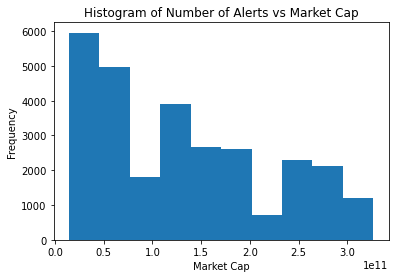

In [40]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(alert_BTC['market_y'], bins=10)
axes1.set_title('Histogram of Number of Alerts vs Market Cap')
axes1.set_xlabel('Market Cap')
axes1.set_ylabel('Frequency')

In [41]:
alert_merge_df['symbol'].value_counts(20).head(20)

BTC     0.453064
ETH     0.134895
LTC     0.068649
USDT    0.055205
XRP     0.048074
BCH     0.021152
TRX     0.018861
EOS     0.009903
ADA     0.009743
XVG     0.008237
NEO     0.007435
XLM     0.007067
XMR     0.006650
ETC     0.006506
BNB     0.003445
ZEC     0.003221
DASH    0.003221
ICX     0.003077
OMG     0.003077
ETN     0.002195
Name: symbol, dtype: float64

In [42]:
alert_merge_df['currency_2'].value_counts(20).head(20)

USD     0.427136
BTC     0.175774
EUR     0.056935
ETH     0.048186
USDT    0.037450
XRP     0.018188
AUD     0.011906
NEO     0.010801
LTC     0.008157
BCC     0.006041
SC      0.005673
DGB     0.005096
CAD     0.004775
ADA     0.004631
OMG     0.004487
XVG     0.004455
XMR     0.004391
DASH    0.004086
ETC     0.004006
DOGE    0.003830
Name: currency_2, dtype: float64

<AxesSubplot:>

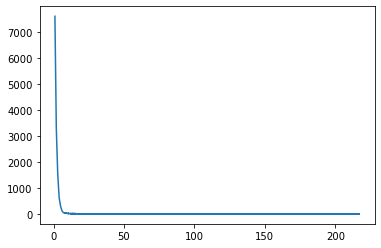

In [43]:
alert_BTC.groupby('user_id', sort = True)['date'].count().value_counts().plot()

In [44]:
alert_BTC_1 = alert_BTC.groupby(['date'])['market_y', 'high', 'low', 'open', 'close', 'volume'].mean()
alert_BTC_1.head()

<ipython-input-44-114a472db846>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  alert_BTC_1 = alert_BTC.groupby(['date'])['market_y', 'high', 'low', 'open', 'close', 'volume'].mean()


,market_y,high,low,open,close,volume
date,,,,,,
2017-01-17,1.462578e+10,910.56,830.80,830.95,907.94,155095008.0
2017-01-18,1.428404e+10,917.50,858.30,909.37,886.62,225676992.0
2017-01-19,1.448662e+10,904.61,884.34,888.34,899.07,105625000.0
2017-01-20,1.442355e+10,899.40,887.01,898.17,895.03,86728400.0
2017-01-21,1.485691e+10,927.37,895.53,895.55,921.79,111158000.0


In [45]:
alert_BTC_1['high_daily_%_change'] = alert_BTC_1['high'].pct_change()
alert_BTC_1['low_daily_%_change'] = alert_BTC_1['low'].pct_change()
alert_BTC_1['open_daily_%_change'] = alert_BTC_1['open'].pct_change()
alert_BTC_1['close_daily_%_change'] = alert_BTC_1['close'].pct_change()
alert_BTC_1['volume_daily_%_change'] = alert_BTC_1['volume'].pct_change()

In [46]:
alert_BTC_1['market_daily_%_change'] = alert_BTC_1['market_y'].pct_change()

In [47]:
alert_BTC_1.head()

,market_y,high,low,open,close,volume,high_daily_%_change,low_daily_%_change,open_daily_%_change,close_daily_%_change,volume_daily_%_change,market_daily_%_change
date,,,,,,,,,,,,
2017-01-17,1.462578e+10,910.56,830.80,830.95,907.94,155095008.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-18,1.428404e+10,917.50,858.30,909.37,886.62,225676992.0,0.007622,0.033101,0.094374,-0.023482,0.455089,-0.023366
2017-01-19,1.448662e+10,904.61,884.34,888.34,899.07,105625000.0,-0.014049,0.030339,-0.023126,0.014042,-0.531964,0.014182
2017-01-20,1.442355e+10,899.40,887.01,898.17,895.03,86728400.0,-0.005759,0.003019,0.011066,-0.004494,-0.178903,-0.004354
2017-01-21,1.485691e+10,927.37,895.53,895.55,921.79,111158000.0,0.031099,0.009605,-0.002917,0.029898,0.281679,0.030046


<AxesSubplot:xlabel='date'>

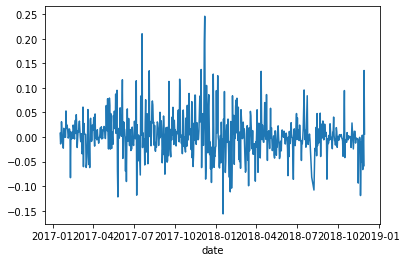

In [48]:
alert_BTC_1['high_daily_%_change'].plot()

<AxesSubplot:xlabel='date'>

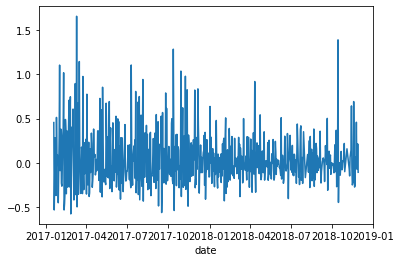

In [49]:
alert_BTC_1['volume_daily_%_change'].plot()

In [50]:
import matplotlib as mp

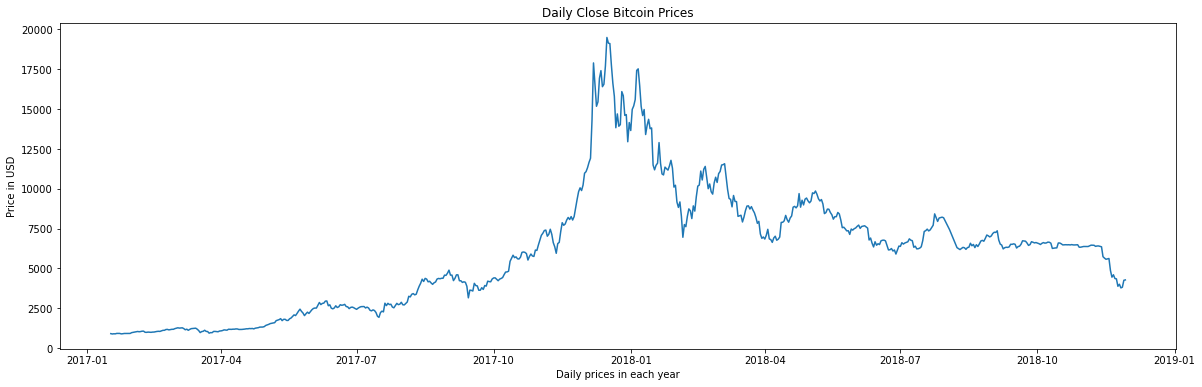

In [51]:
ax = alert_BTC_1['close'].plot(title='Daily Close Bitcoin Prices', 
                                  figsize = (20,6))
ax.set_xlabel('Daily prices in each year')
ax.set_ylabel('Price in USD');
#ax.set_xticks(np.arange(2013,2018))
ax.xaxis.set_minor_formatter(mp.dates.DateFormatter('%m'))

In [57]:
# df_mcap_by_name = pd.DataFrame(alert_merge_df, columns = {'slug', 'market_y', 'name'})
# df_mcap_by_name = df_mcap_by_name.groupby('slug').mean()
# df_mcap_by_name.sort_values(by=['market_y'], inplace=True, ascending=False)
# df_mcap_by_name['mktshare'] = df_mcap_by_name['market_y'] *100 / df_mcap_by_name.market_y.sum()
# subtotal = df_mcap_by_name.market_y.sum() * 100 / df_mcap_by_name.market_y.sum()

In [58]:
# subtotal

In [59]:
# df_mcap_by_name

In [56]:
# df_mcap_by_name_2 = pd.DataFrame(alert_merge_df, columns = {'slug', 'market_y', 'name'})
# df_mcap_by_name_sum = df_mcap_by_name_2.groupby('slug').sum()
# df_mcap_by_name_sum = df_mcap_by_name_2.groupby('slug').sum()
# df_mcap_by_name_sum.sort_values(by=['market_y'], inplace=True, ascending=False)
# df_mcap_by_name_sum['mktshare'] = df_mcap_by_name_sum['market_y'] *100 / df_mcap_by_name_sum.market_y.sum()
# df_mcap_by_name_sum